In [36]:
%matplotlib inline

In [37]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

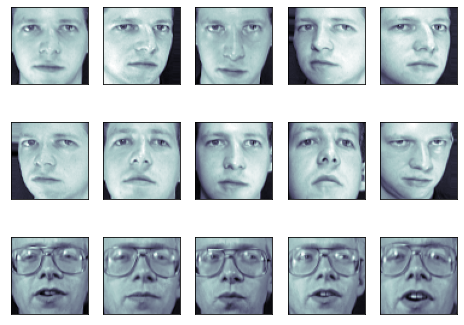

In [38]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=114)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [40]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

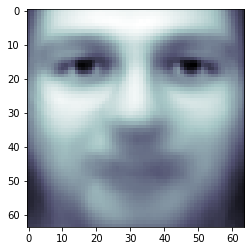

In [41]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [42]:
print(pca.components_.shape)

(150, 4096)


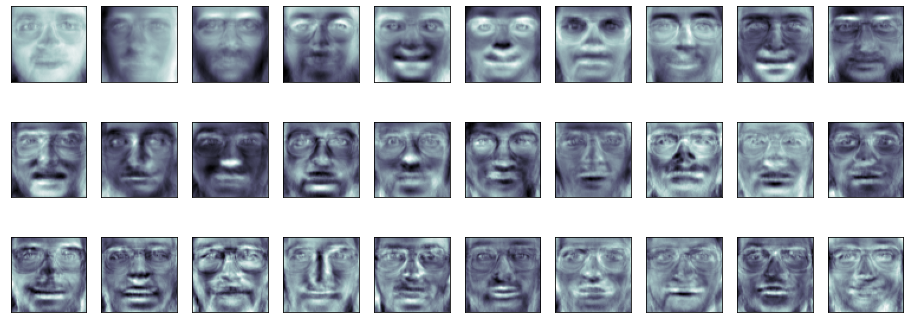

In [43]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [44]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

In [46]:
from sklearn import svm 
clf = svm.SVC(C=5., gamma=0.001) 
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Text(0.5, 1.0, '30')

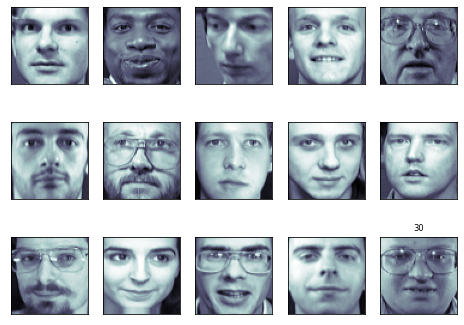

In [47]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),

cmap=plt.cm.bone)

y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
color = ('black' if y_pred == y_test[i] else 'red')
ax.set_title(y_pred, fontsize='small', color=color)

In [48]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      1.00      1.00         2
           2       0.33      1.00      0.50         2
           3       0.67      0.67      0.67         3
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         4
           6       0.50      1.00      0.67         2
           7       1.00      0.67      0.80         3
           8       1.00      0.75      0.86         4
           9       1.00      0.50      0.67         4
          10       1.00      0.50      0.67         2
          11       1.00      0.33      0.50         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       0.17      1.00      0.29         2
          16       1.00      1.00      1.00         3
          17       1.00    

In [49]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 1 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [50]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


#Exercise: 
1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.
2. Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations. 
3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system. 
4. Replace Naive Bayes Classifier with Decision Tree Classifier
and then Support Vector Machine and compare performance of all three of them.

In [51]:
# 1
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)


GaussianNB()

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Naivee Bayees Without the PCA")
print(gnb1.predict(X_test))
print("Accurac")
print("Naivee Bayes with PCA")
print(y_pred)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy is:-\n",accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, gnb1.predict(X_test)))
print("Accuracy is:-\n",accuracy_score(y_test, gnb1.predict(X_test)))

Naivee Bayees Without the PCA
[17 21 28 39 33 15 13  0 11  2 16  9  3 18 30 19  5 25 14 18  2 22 11 22
 16  1 27  7 23 25  3 23  0 34  3  3 23 14 31 34 30 24  3 16  1  5 29 17
 25 30 34  0  5  0 38 36 22  5  6 39 13 29 21 22 18 11  9  3 31 31  4  9
  7  3  0 34  6 15 36 34 39 19  3 26 10 35  0  8 36 10 32  2 35 23 33  2
 15  8 20  2]
Accurac
Naivee Bayes with PCA
[17 21 28 35 33 15 13  2 15 35 16  9 15 18 30 15  5 25 35 18  2 35 11 22
 16  1 27  7 35 25 35 23 15 34  2 19 23 14 31  8 30 24  3 12  1  5 29 17
 25 35  2  0  5 15 38 36 15  5  6 39 13 29 21 22 18 15  9  3  2 31  4 15
  7 27  6 16  6 15 36 34 15 19  3 26 15 39  6  8 36 10 32  2 35 23 33 37
 15  8 20 16]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      1.00      1.00         2
           2       0.33      1.00      0.50         2
           3       0.67      0.67      0.67         3
           4       1.00      0.50      0.67         2
   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# 2 
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, random_state=114)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [57]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train)
print(X_train)

[[6.5 3.2 5.1 2. ]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [5.4 3.  4.5 1.5]
 [5.2 4.1 1.5 0.1]
 [5.4 3.9 1.7 0.4]
 [4.9 3.  1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.4 1.9 0.2]
 [4.8 3.1 1.6 0.2]
 [5.6 3.  4.1 1.3]
 [7.4 2.8 6.1 1.9]
 [5.7 2.8 4.1 1.3]
 [4.7 3.2 1.3 0.2]
 [5.  3.5 1.3 0.3]
 [5.5 2.3 4.  1.3]
 [5.7 2.8 4.5 1.3]
 [6.5 3.  5.5 1.8]
 [5.8 2.8 5.1 2.4]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [6.8 3.2 5.9 2.3]
 [5.5 3.5 1.3 0.2]
 [5.  3.4 1.6 0.4]
 [5.1 3.8 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.8 2.8 4.8 1.4]
 [5.  3.3 1.4 0.2]
 [6.3 3.3 6.  2.5]
 [7.2 3.2 6.  1.8]
 [4.6 3.2 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]
 [7.1 3.  5.9 2.1]
 [5.4 3.7 1.5 0.2]
 [6.  2.9 4.5 1.5]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.3 3.4 5.6 2.4]
 [6.2 2.2 4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [4.8 3.4 1.6 0.2]
 [7.6 3.  6.6 2.1]
 [5.1 3.7 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [7.7 2.8 6.7 2. ]
 [5.2 2.7 3.9 1.4]
 [5.8 2.6 4.  1.2]
 [4.9 3.1 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [5.7 2.6 3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.1 3.4 1.

In [58]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

[[ 0.83585634 -0.44982221]
 [-1.20052539 -0.54154737]
 [-1.1536231  -1.56648091]
 [ 0.34052837  1.11210547]
 [-1.1661458  -1.57307439]
 [-0.99473803 -1.42741454]
 [-1.19101419  0.52130925]
 [-1.04624595 -2.68719517]
 [-1.02633376  0.22082775]
 [-1.13246642  0.57767929]
 [ 0.18129496  0.6587309 ]
 [ 1.38267812 -0.7688737 ]
 [ 0.20653343  0.82561115]
 [-1.27252499  0.46021638]
 [-1.21917772 -0.40599673]
 [ 0.15542861  1.84053803]
 [ 0.3654185   0.96467752]
 [ 0.96997836 -0.03652188]
 [ 0.80427472  1.21532453]
 [-1.22429048  0.64526309]
 [-1.42620956  1.24373316]
 [ 1.25345534 -0.54355098]
 [-1.15314767 -1.1253667 ]
 [-1.07894497 -0.13137971]
 [-1.11321923 -0.92000237]
 [ 0.69413259  1.71586271]
 [ 0.68336915 -0.46051624]
 [-1.18749426 -0.08039605]
 [ 1.23952808  0.07346861]
 [ 1.27575466 -1.15400092]
 [-1.24935478  0.63553694]
 [ 0.63079093 -0.79928006]
 [-0.0182546   1.53272076]
 [ 1.27834546 -0.69097893]
 [-1.09894361 -1.22271377]
 [ 0.44417842  0.42249876]
 [-0.35012617  1.71445351]
 

In [60]:
# 3
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train_pca, y_train)

GaussianNB()

In [61]:
y_pred = gnb2.predict(X_test_pca)
print(y_test.shape)
print(y_pred.shape)
print(y_pred)

(38,)
(38,)
[2 1 1 1 1 2 2 1 1 0 1 0 1 1 1 1 0 1 1 0 2 2 1 1 1 1 0 2 2 1 1 1 0 1 2 0 1
 1]


In [62]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 17  1]
 [ 0  6  7]]


In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred))
print("Accuracy is:-\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.74      0.94      0.83        18
           2       0.88      0.54      0.67        13

    accuracy                           0.82        38
   macro avg       0.87      0.83      0.83        38
weighted avg       0.83      0.82      0.81        38

Accuracy is:-
 0.8157894736842105


In [64]:
# 4
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=114)
dtree.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=114)

In [65]:
y_pred = dtree.predict(X_test_pca)
print(y_test.shape)
print(y_pred.shape)
print(y_pred)

(38,)
(38,)
[2 2 1 1 1 2 2 1 2 0 2 0 1 2 2 1 0 1 1 0 2 2 1 1 2 1 0 2 2 2 1 1 0 1 1 0 1
 1]


In [66]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred))
print("Accuracy is:-\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.94      0.93        38
weighted avg       0.92      0.92      0.92        38

Accuracy is:-
 0.9210526315789473


In [68]:
from sklearn import svm 
clf = svm.SVC(C=5., gamma=0.1) 
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.1)

In [69]:
y_pred = clf.predict(X_test_pca)
print(y_test.shape)
print(y_pred.shape)
print(y_pred)

(38,)
(38,)
[2 2 1 1 1 2 2 1 2 0 2 0 1 2 1 1 0 1 1 0 2 2 1 1 2 1 0 2 2 2 1 1 0 1 1 0 1
 1]


In [71]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 16  2]
 [ 0  2 11]]


In [70]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, y_pred))
print("Accuracy is:-\n",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      0.89      0.89        18
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.89      0.89      0.89        38

Accuracy is:-
 0.8947368421052632
